# Chapter 9 機械学習の基礎（教師なし学習）
# 9-1 教師なし学習
## 9-1-1 教師なし学習のモデルの種類

## 9-1-2 この章で使用するライブラリのインポート

In [77]:
# データ加工・処理・分類ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

%precision 3

'%.3f'

# 9-2 クラスタリング
## 9-2-1 k-means法

## 9-2-2 k-means法でクラスタリングする
### 2-1 訓練データの作成

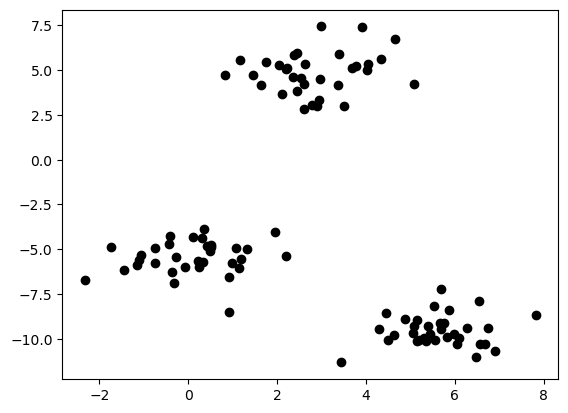

In [78]:
# k-means法を使用するためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意：make_blobsは二つの値を返すため、一方は使用しない"_"で受け取る
X, _ = make_blobs(random_state=10)

# グラフを描画
plt.scatter(X[:, 0], X[:,1], color='black')

### 2-2 KMeansクラスを使ったクラスタリング

In [79]:
# KMeansクラスの可視化
kmeans = KMeans(init='random', n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)

### 2-3 結果の確認

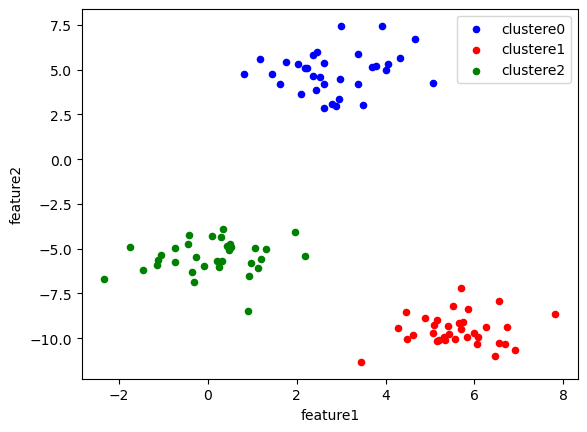

In [80]:
# concatでデータを横に結合（axis=1)を指定
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)

# 上記のデータにて、X軸をfeature1、Y軸をfeature2、クラスター番号をclusterと列名指定
merge_data.columns = ['feature1', 'feature2', 'cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
	ax = data.plot.scatter(x = 'feature1', y = 'feature2', color = colors[i], label = f'clustere{i}', ax=ax)

## 9-2-3 金融マーケティングデータをクラスタリグする
### 3-1 分析要求
### 3-2 分類対象データのダウンロードと読み込み

In [81]:
# webからデータを取得したり、zipファイルを扱うためのライブラリ
import requests, zipfile
import io

# データがあるurl指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# データを取得して展開する
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [82]:
# 対象データを読み込み
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 3-3 データの整理と標準化

In [83]:
print('データの形式(x,y):{}'.format(bank.shape))
print('欠損データの数:{}'.format(bank.isnull().sum().sum()))

データの形式(x,y):(45211, 17)
欠損データの数:0


In [84]:
from sklearn.preprocessing import StandardScaler

# データの列の絞り込み
bank_sub = bank[['age', 'balance', 'campaign', 'previous']]

# 標準化
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


### 3-4 クラスタリング処理


cluster_number
4    14454
0    23791
3     1286
2     3781
5      525
1     1374
Name: count, dtype: int64


Text(0, 0.5, 'count')

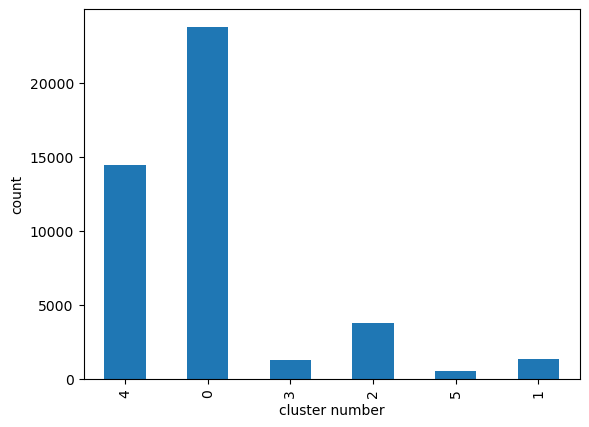

In [85]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(bank_sub_std)
# クラスターの番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')
# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

## 9-2-4 エルボー法によるクラスター数の推定

Text(0, 0.5, 'Distortion')

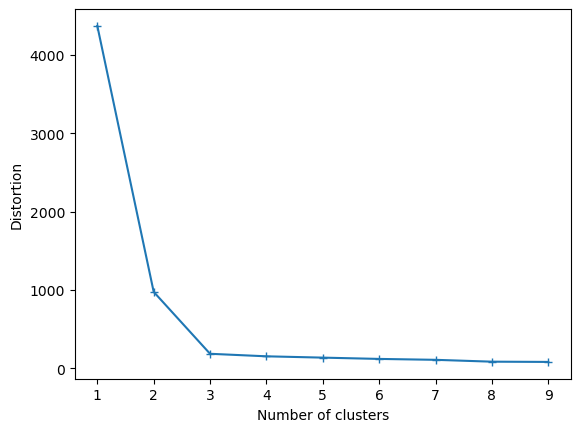

In [86]:
# エルボー法による推定。クラスターを1から10に増やして、それぞれの距離の総和を求める
dist_list = []
for i in range(1,10):
	kmeans = KMeans(n_clusters=i, init='random', random_state=0)
	kmeans.fit(X)
	dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

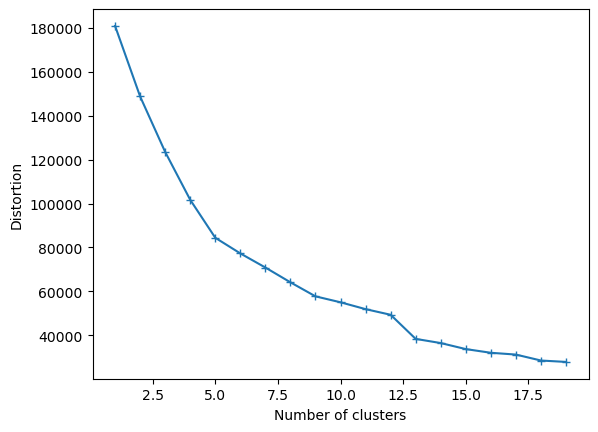

In [87]:
# エルボー法による推定。クラスターを1から20に増やして、それぞれの距離の総和を求める
dist_list = []
for i in range(1,20):
	kmeans = KMeans(n_clusters=i, init='random', random_state=0)
	kmeans.fit(bank_sub_std)
	dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

## 9-2-5 クラスタリング結果の解釈

In [88]:
# 金融機関のデータにクラスター番号のデータを結合
bank_with_cluster = pd.concat([bank, labels], axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [89]:
# 分割のための区切りを設定
bins = [15,20,25,30,35,40,50,55,60,65,100]

# 上の区切りをもとに金融機関のデータを分割
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

/var/folders/5k/0bfc6pzn3z9_z6xn1rvv40sr0000gn/T/ipykernel_90907/3214978940.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)


age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,
0,45,708,3972,8272,6853,3941,0,0,0,0
1,0,20,130,327,306,331,117,71,38,34
2,1,18,233,782,872,1326,337,175,32,5
3,0,11,74,240,219,361,141,156,48,36
4,0,0,0,0,0,5551,3840,3479,850,734
5,1,5,55,119,99,145,53,41,6,1


In [90]:
# 分割したデータ数をカウント
hist_age = pd.value_counts(qcut_age)
hist_age

/var/folders/5k/0bfc6pzn3z9_z6xn1rvv40sr0000gn/T/ipykernel_90907/2781008844.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  hist_age = pd.value_counts(qcut_age)


age
[40, 50)     11655
[30, 35)      9740
[35, 40)      8349
[50, 55)      4488
[25, 30)      4464
[55, 60)      3922
[60, 65)       974
[65, 100)      810
[20, 25)       762
[15, 20)        47
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='cluster_number'>

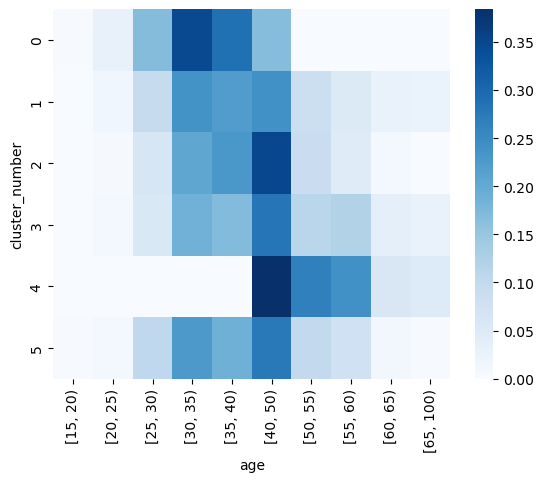

In [91]:
sns.heatmap(cross_cluster_age.apply(lambda x: x/x.sum(), axis=1), cmap='Blues')

In [92]:
# 職業についても見ていく
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3022,5426,702,413,4980,55,826,2496,814,4290,690,77
1,193,239,42,21,335,53,42,113,53,245,33,5
2,387,845,146,108,863,60,144,358,40,704,90,36
3,109,176,54,36,418,77,71,69,22,194,49,11
4,1414,2915,530,655,2733,2008,477,1077,3,2054,434,154
5,46,131,13,7,129,11,19,41,6,110,7,5


<Axes: xlabel='job', ylabel='cluster_number'>

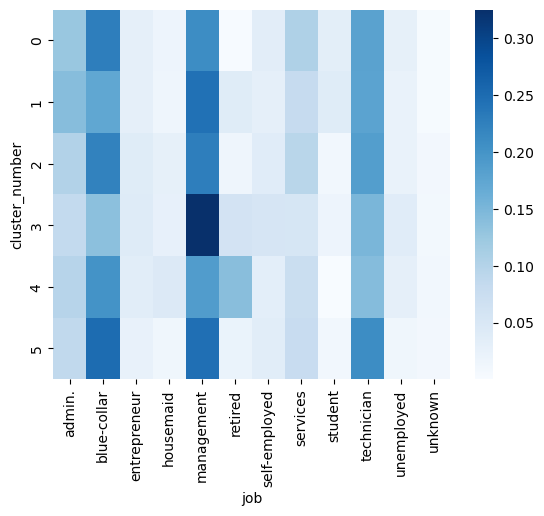

In [93]:
sns.heatmap(cross_cluster_job.apply(lambda x: x/x.sum(), axis=1), cmap='Blues')

### 9-2-6 k-means法以外の手法

### 練習問題 9-1

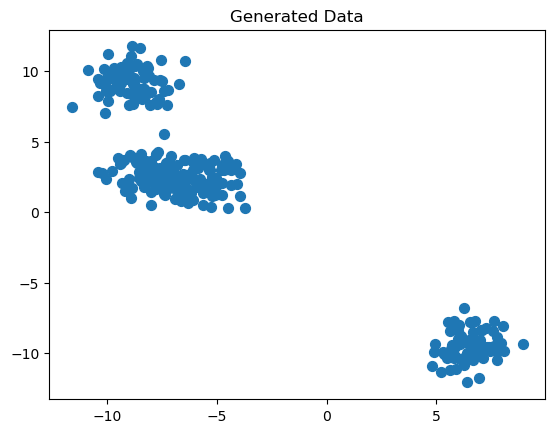

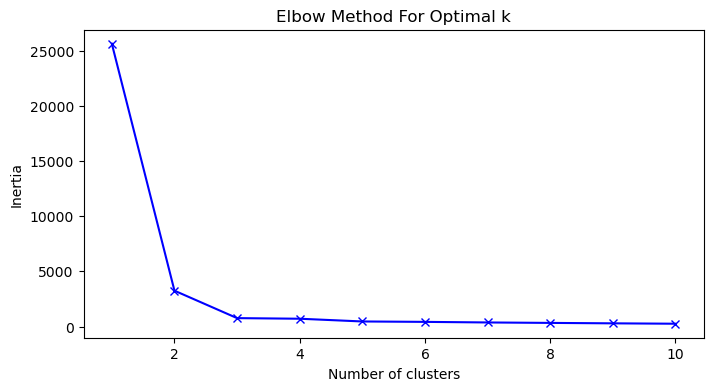

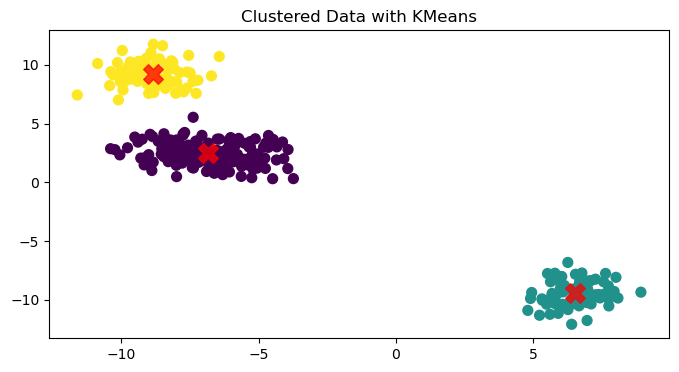

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# データ生成
X, y = make_blobs(n_samples=300, centers=4, random_state=52)

# データの散布図を表示
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()

# エルボー法による最適クラス数の決定
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=52).fit(X)
    inertia.append(kmeans.inertia_)

# エルボー法のグラフを表示
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# 最適クラス数でクラスタリング
optimal_k = 3  # エルボー法の結果から最適なクラス数を設定
kmeans = KMeans(n_clusters=optimal_k, random_state=52)
y_kmeans = kmeans.fit_predict(X)

# クラスタリング結果の散布図を表示
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clustered Data with KMeans")
plt.show()

# 9-3 主成分分析
## 9-3-1 主成分分析を試す

相関係数0.674


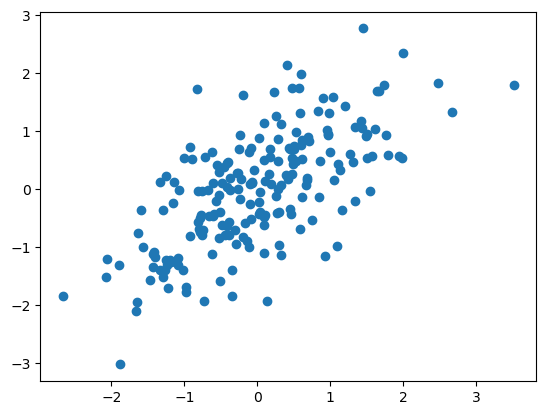

In [95]:
from sklearn.preprocessing import StandardScaler

# RandomState オブジェクトを形成
sample = np.random.RandomState()

# 2つの乱数を生成
X = np.dot(sample.rand(2,2), sample.randn(2,200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ化
print('相関係数{:.3f}'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

### 1-1 主成分分析

In [96]:
# インポート
from sklearn.decomposition import PCA

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

### 1-2 学習結果の確認

In [97]:
# coomponents_属性（固有ベクトル）
print(pca.components_)

[[ 0.707  0.707]
 [-0.707  0.707]]


In [98]:
# explained_variance_属性（各主成分の分散）
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.682 0.328]


In [99]:
# explained_variance_ratio_属性（各種成分が持つ分散の比率）
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合:[0.837 0.163]


(-2.977, 3.825, -3.318, 3.061)

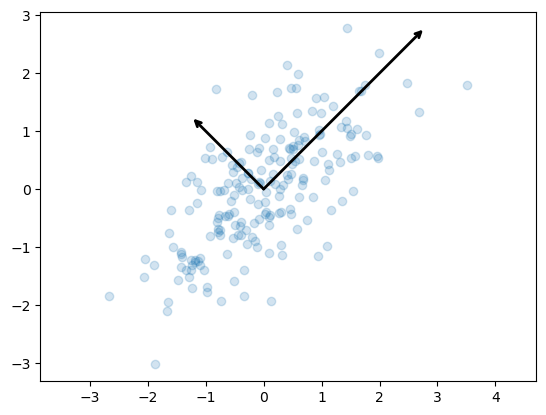

In [100]:
# 数字だけでは分かりにくいので図示してみる
# パラメータ設定
arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)

# 矢印を描くための関数
def draw_vector(v0, v1):
	plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

# 元のデータをプロット
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
	v = vector * 3 * np.sqrt(length)
	draw_vector(pca.mean_, pca.mean_  + v)

plt.axis('equal')

## 9-3-2 主成分分析の実例

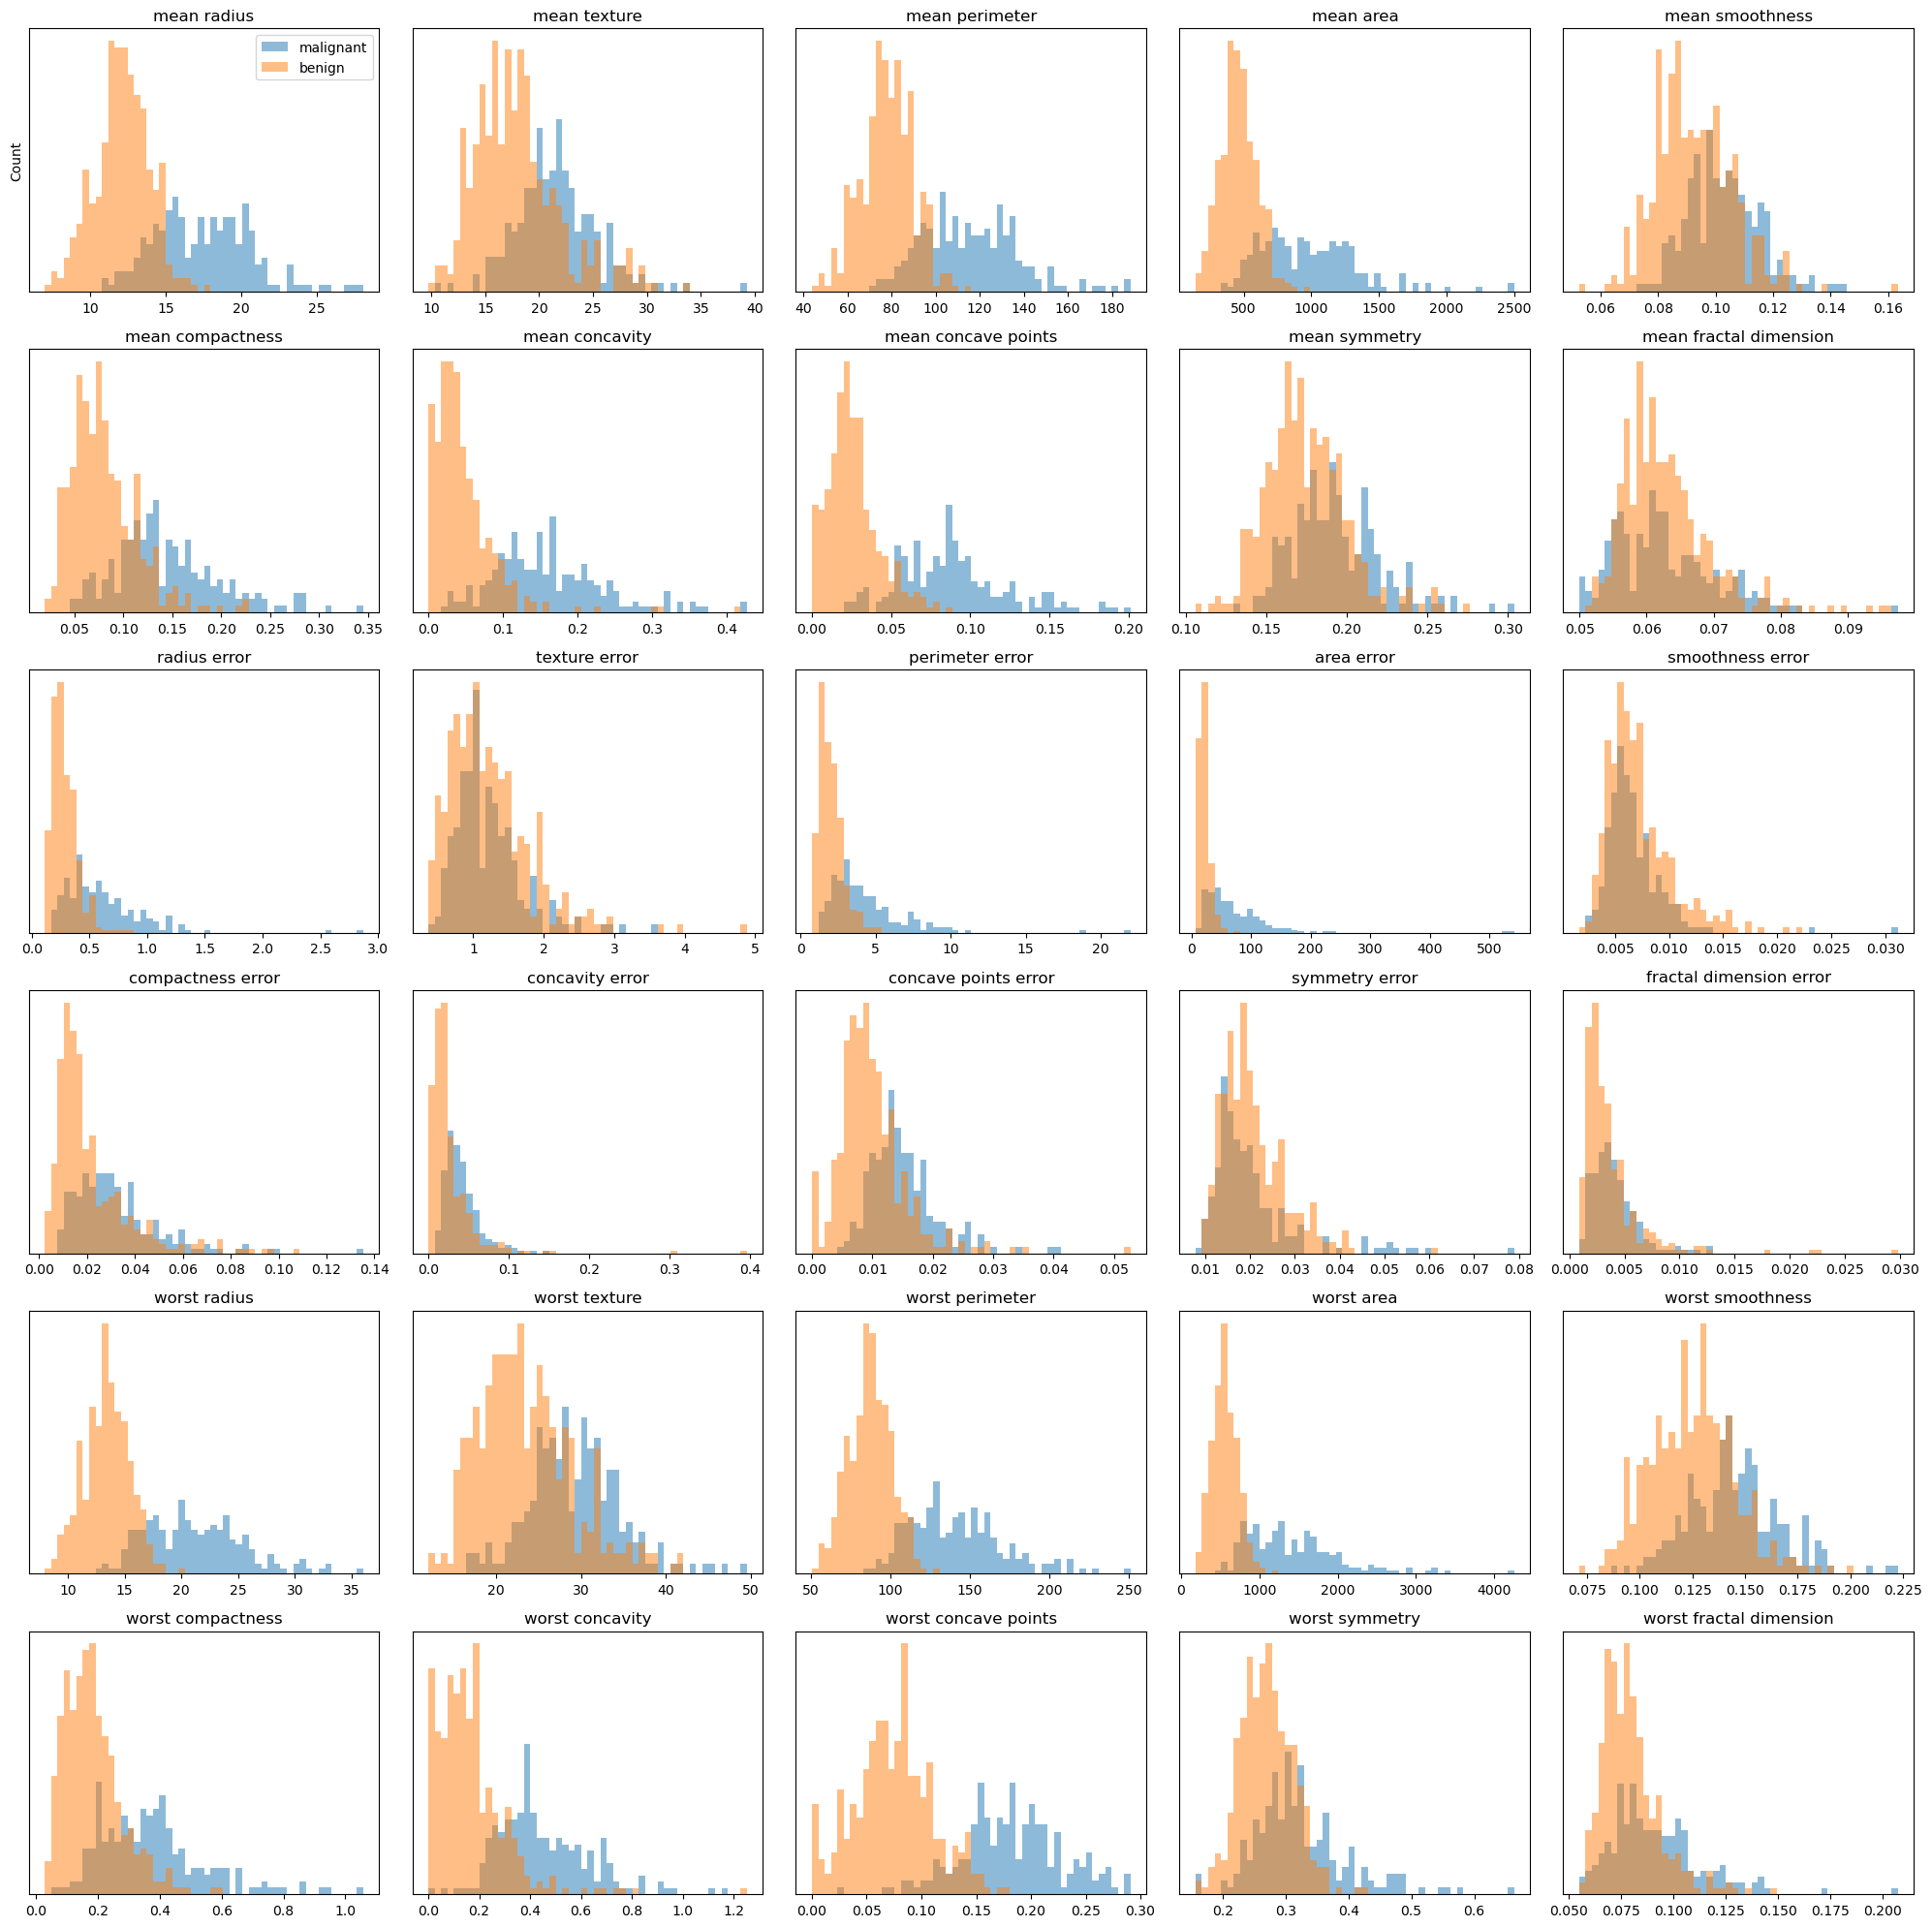

In [104]:
import matplotlib.pyplot as plt
# 乳がんデータを読み込むためのインポート
from sklearn.datasets import load_breast_cancer

# 乳がんデータの取得
cancer = load_breast_cancer()

# データをmalignant（悪性）かbenign(良性)に分けるためのフィルター処理
# malignant（悪性）はcancer.targetが0
malignant = cancer.data[cancer.target==0]

# benign(良性)はcanver.targetが1
benign = cancer.data[cancer.target==1]
# malignant（悪性）がブルー、benign（良性）がオレンジ色のヒストグラム
# 各図は、各々の説明変数（mean radiusなど)と目的変数との関係を示したヒストグラム
fig, axes = plt.subplots(6, 5, figsize=(20,20))
ax = axes.ravel()
for i in range(30):
	_, bins = np.histogram(cancer.data[:,i], bins=50)
	ax[i].hist(malignant[:,i], bins, alpha=.5)
	ax[i].hist(benign[:,i], bins, alpha=.5)
	ax[i].set_title(cancer.feature_names[i])
	ax[i].set_yticks(())

# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(['malignant', 'benign'],loc='best')
fig.tight_layout()

主成分分析により、20以上ある変数を削減していく

In [105]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析（2変数まで削減）
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 表示
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


In [106]:
# 列にラベルをつける、1つ目が第一主成分、2つ目が第2主成分
X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])

# 上のデータに、目的変数(cancer.target)を紐づける、横に結合
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

# 悪性、良性を分ける
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

<Axes: xlabel='pc1', ylabel='pc2'>

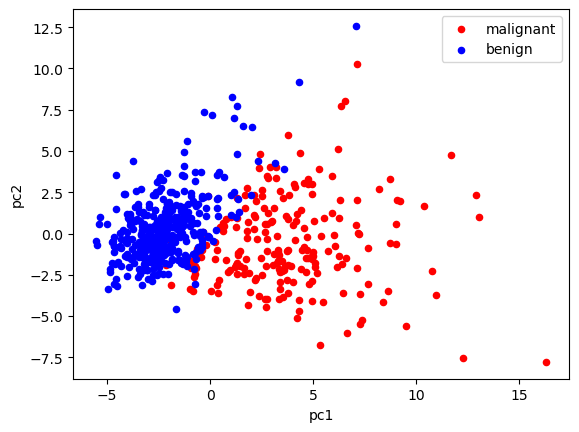

In [107]:
# 悪性をプロット
ax = pca_malignant.plot.scatter(x = 'pc1', y = 'pc2', color = 'red', label = 'malignant')
# 良性をプロット
pca_benign.plot.scatter(x = 'pc1', y = 'pc2', color = 'blue', label = 'benign', ax=ax)

### 練習問題 9-2

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

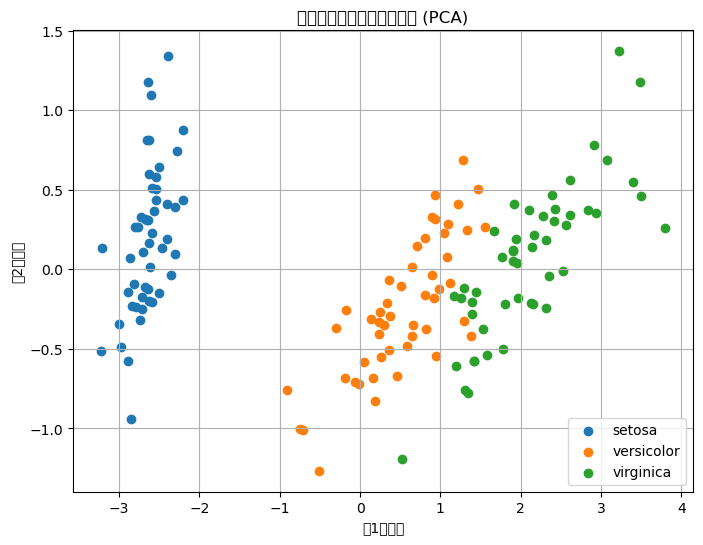

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# データを読み込む
iris = load_iris()
X = iris.data
y = iris.target

# PCAを実行する（主成分数は2）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 散布図を作成する
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=iris.target_names[target])

plt.xlabel('第1主成分')
plt.ylabel('第2主成分')
plt.title('アヤメデータの主成分分析 (PCA)')
plt.legend()
plt.grid(True)
plt.show()


# 9-4 マーケットバスケット分析とアソシエーションルール
## 9-4-1 マーケットバスケット分析とは
## 9-4-2 マーケットバスケット分析のためのサンプルデータを読み込む

In [114]:
import os
import pandas as pd

# wgetを使用してファイルをダウンロード
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
output_file = 'Online_Retail.xlsx'
os.system(f'wget {url} -O {output_file}')

--2024-05-20 18:50:25--  http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Online_Retail.xlsx’

     0K .......... .......... .......... .......... ..........  166K
    50K .......... .......... .......... .......... ..........  374K
   100K .......... .......... .......... .......... .......... 96.3M
   150K .......... .......... .......... .......... ..........  371K
   200K .......... .......... .......... .......... ..........  372K
   250K .......... .......... .......... .......... ..........  466K
   300K .......... .......... .......... .......... .......... 1.83M
   350K .......... .......... .......... .......... ..........  368K
   400K .......... .......... .......... .......... ..........  385K
   450K ...

0

In [115]:
trans = pd.read_excel('Online_Retail.xlsx', sheet_name='Online Retail')
trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 2-1 データの整理と確認

In [116]:
# InoivceNoの先頭1文字をcancel_flgとして追加
trans['cancel_flg'] = trans.InvoiceNo.map(lambda x: str(x)[0])

# cancel_flgでグルーピングして集計
trans.groupby('cancel_flg').size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [118]:
trans = trans[(trans.cancel_flg=='5') & (trans.CustomerID.notnull())]

## 9-4-3 アソシエーションルール

In [119]:
# StockCodeごとに件数を数え、上位5件を表示
trans['StockCode'].value_counts().head()

StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: count, dtype: int64

### 3-1 支持度（support）

In [ ]:
# 全てのInvoiceNoをtrans_allとして抽出